## **The aim of this project is to build a classifier model to predict rain in Seattle**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
sns.set_palette('rocket')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.impute import SimpleImputer # Impute the missing values

from sklearn.ensemble import RandomForestClassifier, StackingClassifier, StackingRegressor, RandomForestRegressor
from sklearn.svm import LinearSVC , SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix , classification_report # metrics functions for catigorical data

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # metrics functions for continuous data


## Load Data

In [ ]:
# read data from the driver csv file
URL = 'https://drive.google.com/file/d/16ZSKEHFlF0QVnrdUu3Zb2yJg1t95awkn/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
print(path)
df = pd.read_csv(path)
df.head()

https://drive.google.com/uc?export=download&id=16ZSKEHFlF0QVnrdUu3Zb2yJg1t95awkn


,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
# check missing values
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [ ]:
# show missing rows
df[df['PRCP'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


### Pre-porcessing data

In [ ]:
# fill the missing value in PRCP with mean
imputer_mean = SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer_mean.fit(df[['PRCP']]) # train the 
df['PRCP'] = imputer_mean.transform(df[['PRCP']])

In [ ]:
# fill the missing values in RAIN with mode (False)
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imputer_mode.fit(df[['RAIN']])
df['RAIN'] = imputer_mode.transform(df[['RAIN']])

In [ ]:
# convert datatype to boolean
df["RAIN"] = df["RAIN"].astype(bool)

In [ ]:
# check the result after impute step
df.iloc[18415]

DATE    1998-06-02
PRCP      0.106222
TMAX            72
TMIN            52
RAIN         False
Name: 18415, dtype: object

#### 1. Separate your data set into training and testing. (80/20 split)

In [ ]:
# split data to training and testing with ratio 80/20
X_train, X_test, y_train , y_test = train_test_split(
    df.drop(['DATE','PRCP','RAIN'], axis=1),
    df['RAIN'],
    train_size = 0.8,
    test_size = 0.2,
    random_state = 42
)

In [ ]:
# shape of data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20440, 2), (20440,), (5111, 2), (5111,))

### 2. Calculate the Precision and Recall for the classification (Predict RAIN)

### Build model

#### **Baseline model**

In [ ]:
# Baseline (0.575978)
y_train.value_counts(normalize=True)

False    0.572114
True     0.427886
Name: RAIN, dtype: float64

##### **Logistic Regression model**

<p align="center">
  <img src="https://www.tibco.com/sites/tibco/files/media_entity/2020-09/logistic-regression-diagram.svg">
</p>



In [ ]:
# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train) # train model
preds_lr = lr.predict(X_test) # predict results 

print("----------------------------------------------------------")
print('Logistic Regression')
print(classification_report(y_test, preds_lr))

----------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

       False       0.78      0.77      0.78      2957
        True       0.69      0.70      0.70      2154

    accuracy                           0.74      5111
   macro avg       0.74      0.74      0.74      5111
weighted avg       0.74      0.74      0.74      5111



**Random Forest Classifier**
<p align="center">
  <img src="https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png">
</p>

In [ ]:
# create Random Forest Classifer
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) # train model
preds_rf = rf.predict(X_test) # predict results 

print("----------------------------------------------------------")
print('Random Forest Classifier')
print(classification_report(y_test, preds_rf))

----------------------------------------------------------
Random Forest Classifier
              precision    recall  f1-score   support

       False       0.80      0.77      0.78      2957
        True       0.70      0.74      0.72      2154

    accuracy                           0.76      5111
   macro avg       0.75      0.75      0.75      5111
weighted avg       0.76      0.76      0.76      5111



In [ ]:
parameters = {
    'n_estimators':[50,100,150,200],
    'max_depth': [20,40,60,80,100]
    } # The number of trees in the forest.


clf = GridSearchCV(rf, parameters, cv=5) # pass random forest classifer model, parameters and number of cross validation
clf.fit(X_train, y_train) # trian model
preds_clf = clf.predict(X_test) # predict result

print("----------------------------------------------------------")
print('The best model of Random Forest Classifier')
print(classification_report(y_test, preds_clf))

----------------------------------------------------------
The best model of Random Forest Classifier
              precision    recall  f1-score   support

       False       0.80      0.76      0.78      2957
        True       0.69      0.74      0.72      2154

    accuracy                           0.75      5111
   macro avg       0.75      0.75      0.75      5111
weighted avg       0.76      0.75      0.75      5111



**For classifcation, the Random Forest classifier model achieved a high accuracy of around 76% .**

In [ ]:
preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.80      0.76      0.78      2957
        True       0.69      0.74      0.72      2154

    accuracy                           0.75      5111
   macro avg       0.75      0.75      0.75      5111
weighted avg       0.76      0.75      0.75      5111



### **3. Calculate the MSE, MAE, or SSE for the regression heuristic you made yesterday.**

In [ ]:
# split data to training and testing with ratio 80/20
X_train, X_test, y_train , y_test = train_test_split(
    df.drop(['DATE','PRCP'], axis=1),
    df['PRCP'],
    train_size = 0.8, 
    test_size = 0.2,
    random_state = 42
)

In [ ]:
# Baseline (0.10706861268317278)
y_train.mean()

0.10706861268317278

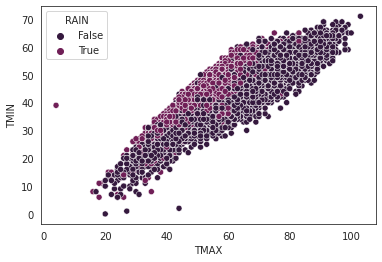

In [ ]:
# there is strong positive relaiton between TMAX and TMIN
sns.scatterplot(data = df, x= 'TMAX', y ='TMIN',hue = 'RAIN')

plt.xlabel("TMAX")
plt.ylabel("TMIN");

In [ ]:
# Create a sum of squared error Function
def sse(y_true, y_pred):
  sse = sum(np.square(y_true - y_pred))
  return sse

**Support Vector Regresion**

<p align="center">
  <img src="
https://miro.medium.com/max/600/1*Fjj7EblDs2J88GgJmyKL8w.png">
</p>


In [ ]:
# create a Support vector regresion model
svr = SVR()
svr.fit(X_train,y_train) # train model

pred_svr = svr.predict(X_test) # predict results

print("----------------------------------------------------------")
print("Support vector regresion model")
print("Mean squared error: ",mean_squared_error(y_test, pred_svr))
print("Mean squared error: ",mean_absolute_error(y_test, pred_svr))
print("Sum squared error: ",sse(y_test, pred_svr))
print("R2 score: ",r2_score(y_test, pred_svr))
print("----------------------------------------------------------")

----------------------------------------------------------
Support vector regresion model
Mean squared error:  0.039095209912116825
Mean squared error:  0.09494662776756596
Sum squared error:  199.8156178608291
R2 score:  0.25173501972628687
----------------------------------------------------------


**Random Forest Regressor**

In [ ]:
# create a Random Forest Regressor model
rr = RandomForestRegressor()
rr.fit(X_train,y_train) # train model

pred_rr = rr.predict(X_test) # predict results

print("----------------------------------------------------------")
print("Random Forest Regressor model")
print("Mean squared error: ",mean_squared_error(y_test, pred_rr))
print("Mean squared error: ",mean_absolute_error(y_test, pred_rr))
print("Sum squared error: ",sse(y_test, pred_rr))
print("R2 score: ",r2_score(y_test, pred_rr))
print("----------------------------------------------------------")

----------------------------------------------------------
Random Forest Regressor model
Mean squared error:  0.03781289292898408
Mean squared error:  0.0883557914929049
Sum squared error:  193.26169576003716
R2 score:  0.2762779981178951
----------------------------------------------------------


**Stacking Regressor**

In [ ]:
# Stacking Regressor 
stack_list = [("svr",SVR()),
            ("lr",LinearRegression())]

# Create Stacked Regressor
stack_model = StackingRegressor(stack_list, cv=5) # pass stack models, and number of cross validation
stack_model

stack_model.fit(X_train,y_train)

pred_stack = stack_model.predict(X_test)

print("----------------------------------------------------------")
print("Stacking Regressor  model")
print("Mean squared error: ",mean_squared_error(y_test, pred_stack))
print("Mean squared error: ",mean_absolute_error(y_test, pred_stack))
print("Sum squared error: ",sse(y_test, pred_stack))
print("R2 score: ",r2_score(y_test, pred_stack))
print("----------------------------------------------------------")


----------------------------------------------------------
Stacking Regressor  model
Mean squared error:  0.036641767797583484
Mean squared error:  0.10206678560075738
Sum squared error:  187.2760752134494
R2 score:  0.29869281377729173
----------------------------------------------------------


**For regression, the stack model achieved a high R2 score of around 30% .**